#### load data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# # X = exam scores (single feature)
# X = np.array([[35], [45], [52], [60], [70], [80], [90]])  # exam scores
# y = np.array([[0], [0], [0], [1], [1], [1], [1]])  
# # 0 = fail, 1 = pass

np.random.seed(42)

# number of samples
m = 200  

# generate random 2D points
X = np.random.randn(m, 2)  

# rule: label = 1 if x1 + x2 > 0 else 0
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)

print("X shape:", X.shape)  # (200, 2)
print("y shape:", y.shape)  # (200, 1)


X_1 = (X - X.mean(axis=0)) / X.std(axis=0)

X shape: (200, 2)
y shape: (200, 1)


In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def param(X_1, w, b):
    return np.dot(X_1, w) + b

def forward(X_1, w, b):
    z = param(X_1, w, b)
    y_hat = sigmoid(z)
    return y_hat

def compute_loss(y, y_hat):
    m = y.shape[0]
    loss = -(1/m) * np.sum(y * np.log(y_hat + 1e-7) + (1 - y) * np.log(1 - y_hat + 1e-7))
    return loss

def compute_gradient(X_1, y, y_hat):
    m = X_1.shape[0]
    error = y_hat - y
    dw = (1/m) * X_1.T.dot(error)
    db = (1/m) * np.sum(error)
    return dw, db

def update_param(w, b, dw, db, alpha):
    w = w - alpha * dw
    b = b - alpha * db

    return w, b

def train_logistic(X_1, y, epoch=1000, learning_rate =  0.01, iteration=2000):
    m, n = X_1.shape
    w = np.zeros((n,1))
    b = 0.0
    
    for i in range(iteration):
        y_hat = forward(X_1, w, b)
        loss = compute_loss(y, y_hat)
        dw, db = compute_gradient(X_1, y, y_hat)
        w, b = update_param(w, b, dw, db,learning_rate)

        if i % 100 == 0 or i == iteration - 1:
            print(f"epoch : {i:4d} | loss : {loss:.4f}")

    return w, b 


def predict(X_1, w, b, threshhold = 0.5):
    probs = forward(X_1, w, b)
    return (probs >= threshhold).astype(int)

def accuracy(X_1, y, w, b):
    y_pred = predict(X_1, w, b)
    return (y_pred == y).mean()

w_learned, b_learned = train_logistic(
    X_1,y,
    epoch=5000,
    learning_rate=0.01,
    iteration=5000
)

print(f"w_learned : {w_learned.ravel()} | b_learned : {b_learned}")
print(f"accuracy of the trained model : {accuracy(X_1, y, w_learned, b_learned)}")

epoch :    0 | loss : 0.6931
epoch :  100 | loss : 0.5680
epoch :  200 | loss : 0.4879
epoch :  300 | loss : 0.4331
epoch :  400 | loss : 0.3933
epoch :  500 | loss : 0.3630
epoch :  600 | loss : 0.3390
epoch :  700 | loss : 0.3195
epoch :  800 | loss : 0.3032
epoch :  900 | loss : 0.2893
epoch : 1000 | loss : 0.2774
epoch : 1100 | loss : 0.2669
epoch : 1200 | loss : 0.2577
epoch : 1300 | loss : 0.2494
epoch : 1400 | loss : 0.2420
epoch : 1500 | loss : 0.2353
epoch : 1600 | loss : 0.2291
epoch : 1700 | loss : 0.2235
epoch : 1800 | loss : 0.2183
epoch : 1900 | loss : 0.2135
epoch : 2000 | loss : 0.2090
epoch : 2100 | loss : 0.2049
epoch : 2200 | loss : 0.2010
epoch : 2300 | loss : 0.1973
epoch : 2400 | loss : 0.1939
epoch : 2500 | loss : 0.1907
epoch : 2600 | loss : 0.1876
epoch : 2700 | loss : 0.1847
epoch : 2800 | loss : 0.1819
epoch : 2900 | loss : 0.1793
epoch : 3000 | loss : 0.1768
epoch : 3100 | loss : 0.1744
epoch : 3200 | loss : 0.1722
epoch : 3300 | loss : 0.1700
epoch : 3400 |

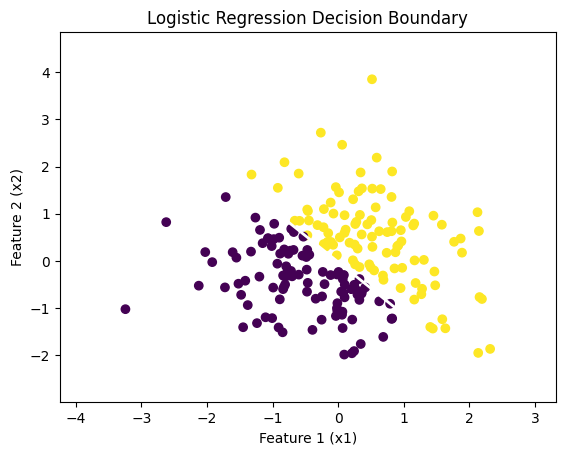

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training data (color by class label)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.title("Logistic Regression Decision Boundary")

# Create grid for feature space
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities on the grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = forward(grid, w_learned, b_learned).reshape(xx.shape)

# Draw decision boundary (p=0.5)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", linewidths=2)

plt.show()
